In [1]:
# https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc/about_data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_NYPDArrDat = pd.read_csv('NYPD_Arrest_Data__Year_to_Date__20240702.csv')
df_NYPDArrDat.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,280255493,01/10/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,26,0,<18,M,BLACK,996342,236149,40.814845,-73.956312,POINT (-73.956312 40.814845)
1,279805419,01/02/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,WHITE HISPANIC,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
2,279895750,01/03/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,0,65+,F,WHITE,1026836,180689,40.662526,-73.846499,POINT (-73.846499 40.662526)
3,280809090,01/19/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,B,49,0,45-64,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
4,280357135,01/11/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,K,81,2,25-44,F,BLACK,1002457,192292,40.694456,-73.934343,POINT (-73.934343 40.694456)


In [2]:
df_NYPDArrDat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63621 entries, 0 to 63620
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ARREST_KEY                63621 non-null  int64  
 1   ARREST_DATE               63621 non-null  object 
 2   PD_CD                     63619 non-null  float64
 3   PD_DESC                   63621 non-null  object 
 4   KY_CD                     63612 non-null  float64
 5   OFNS_DESC                 63621 non-null  object 
 6   LAW_CODE                  63621 non-null  object 
 7   LAW_CAT_CD                63219 non-null  object 
 8   ARREST_BORO               63621 non-null  object 
 9   ARREST_PRECINCT           63621 non-null  int64  
 10  JURISDICTION_CODE         63621 non-null  int64  
 11  AGE_GROUP                 63621 non-null  object 
 12  PERP_SEX                  63621 non-null  object 
 13  PERP_RACE                 63621 non-null  object 
 14  X_COOR

In [5]:
df_NYPDArrDat.describe().T

,count,mean,std,min,25%,50%,75%,max
ARREST_KEY,63621.0,2.822203e+08,1.387821e+06,2.797635e+08,2.810329e+08,2.822323e+08,2.834321e+08,2.846252e+08
PD_CD,63619.0,4.404147e+02,2.745374e+02,2.000000e+00,1.390000e+02,4.190000e+02,7.050000e+02,9.730000e+02
KY_CD,63612.0,2.549410e+02,1.502964e+02,1.010000e+02,1.130000e+02,3.410000e+02,3.440000e+02,9.950000e+02
ARREST_PRECINCT,63621.0,6.333728e+01,3.519268e+01,1.000000e+00,4.000000e+01,6.300000e+01,1.010000e+02,1.230000e+02
JURISDICTION_CODE,63621.0,9.467314e-01,7.187989e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.700000e+01
X_COORD_CD,63621.0,1.005320e+06,2.219886e+04,0.000000e+00,9.905030e+05,1.005040e+06,1.017689e+06,1.067185e+06
Y_COORD_CD,63621.0,2.076825e+05,2.948957e+04,0.000000e+00,1.857100e+05,2.068510e+05,2.352650e+05,2.712820e+05
Latitude,63621.0,4.073540e+01,2.422989e-01,0.000000e+00,4.067635e+01,4.073443e+01,4.081242e+01,4.091124e+01
Longitude,63621.0,-7.392150e+01,4.216442e-01,-7.425271e+01,-7.397743e+01,-7.392490e+01,-7.387917e+01,0.000000e+00


In [7]:
df_NYPDArrDat.describe(include='object').T

,count,unique,top,freq
ARREST_DATE,63621,91,03/14/2024,1040
PD_DESC,63621,221,ASSAULT 3,6597
OFNS_DESC,63621,62,ASSAULT 3 & RELATED OFFENSES,8960
LAW_CODE,63621,770,PL 1552500,6526
LAW_CAT_CD,63219,6,M,35580
ARREST_BORO,63621,5,K,17402
AGE_GROUP,63621,5,25-44,37254
PERP_SEX,63621,2,M,52432
PERP_RACE,63621,7,BLACK,29466
New Georeferenced Column,63621,17879,POINT (-73.881509 40.671404),464


In [9]:
df_NYPDArrDat.isnull().sum()

ARREST_KEY                    0
ARREST_DATE                   0
PD_CD                         2
PD_DESC                       0
KY_CD                         9
OFNS_DESC                     0
LAW_CODE                      0
LAW_CAT_CD                  402
ARREST_BORO                   0
ARREST_PRECINCT               0
JURISDICTION_CODE             0
AGE_GROUP                     0
PERP_SEX                      0
PERP_RACE                     0
X_COORD_CD                    0
Y_COORD_CD                    0
Latitude                      0
Longitude                     0
New Georeferenced Column      0
dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

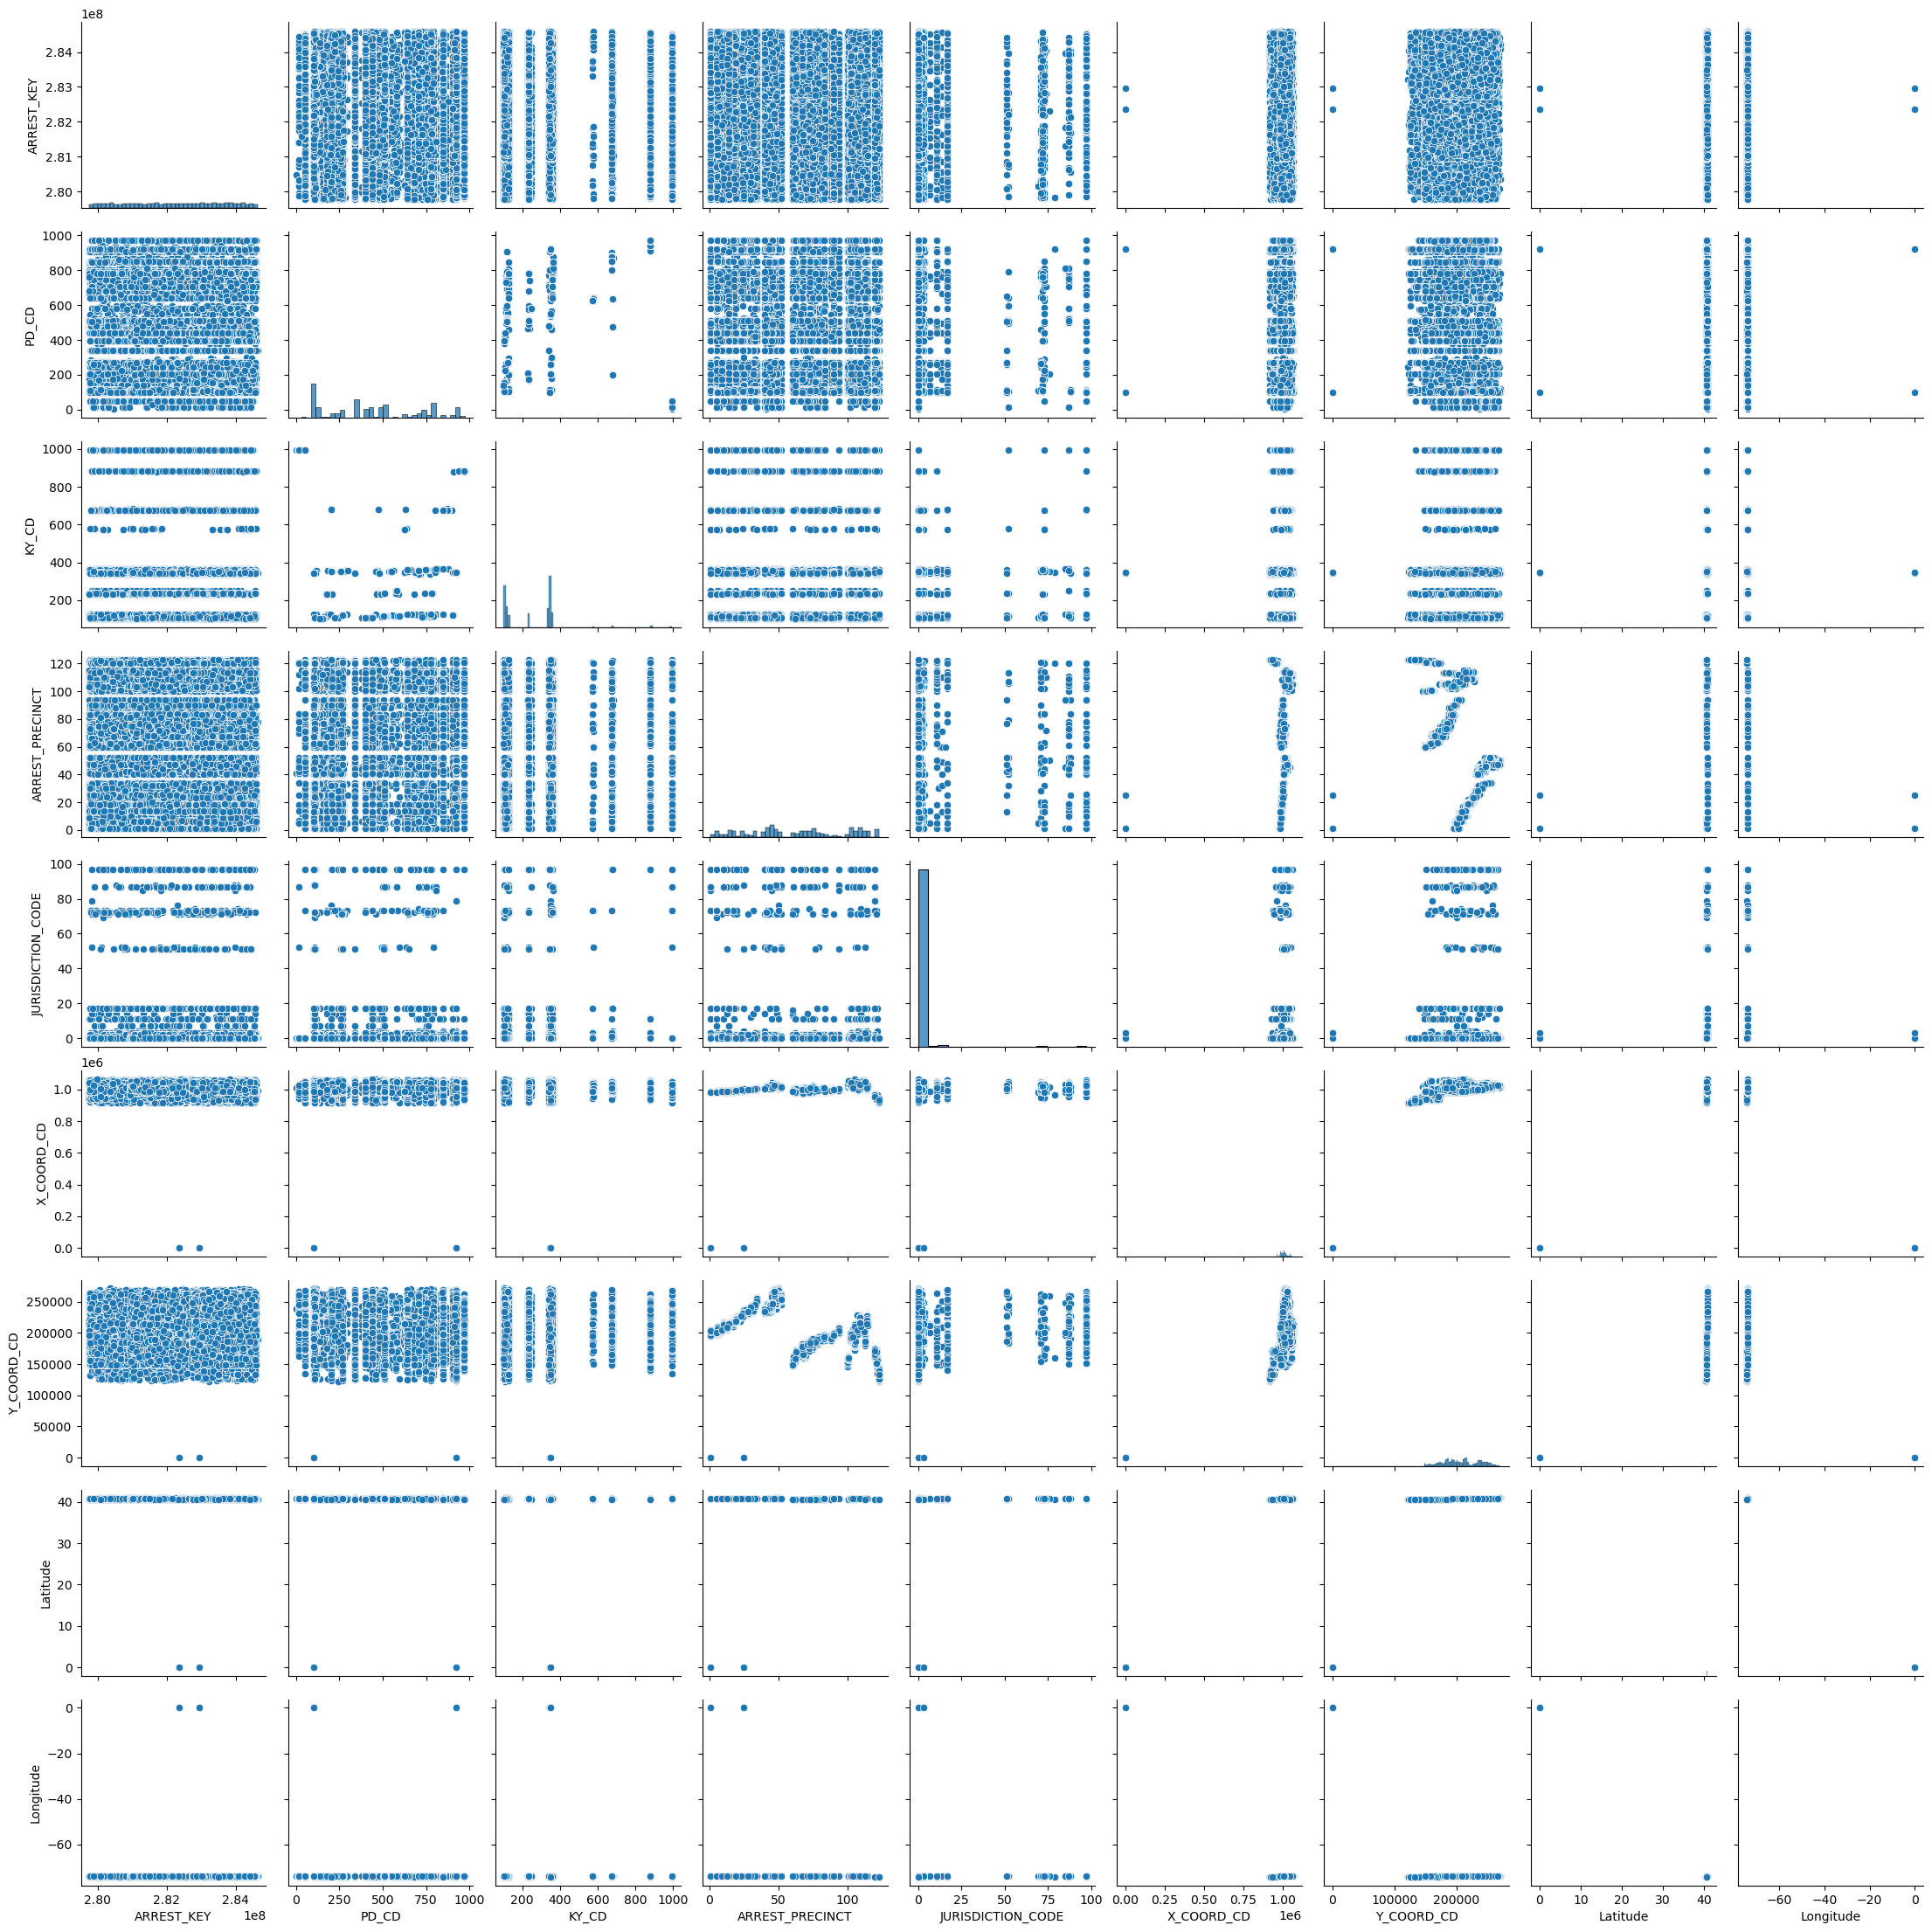

In [11]:
sns.pairplot(df_NYPDArrDat)

In [12]:
df_NYPDArrDat['ARREST_PRECINCT'].value_counts()

ARREST_PRECINCT
14     2505
75     2078
40     1938
44     1933
103    1896
       ... 
123     306
100     299
20      257
111     200
22       14
Name: count, Length: 77, dtype: int64

In [13]:
# check if the ARREST_KEY column contains only unique values by
# comparing the count of unique values using nunique() with the length of the column
column_name = 'ARREST_KEY'  
num_unique_values = df_NYPDArrDat[column_name].nunique()
total_values = len(df_NYPDArrDat[column_name])

if num_unique_values == total_values:
    print(f"All values in the column '{column_name}' are unique.")
else:
    print(f"The column '{column_name}' contains duplicate values.")

All values in the column 'ARREST_KEY' are unique.


In [17]:
# my home precint is 108th https://www.nyc.gov/site/nypd/bureaus/patrol/precincts/108th-precinct.page
# and the 104th is a neighboring precinct that we'll compare

df_NYPDArrDat[(df_NYPDArrDat['ARREST_PRECINCT'] == 108) | (df_NYPDArrDat['ARREST_PRECINCT'] == 104)].groupby('ARREST_PRECINCT')['ARREST_KEY'].count()

ARREST_PRECINCT
104    572
108    539
Name: ARREST_KEY, dtype: int64

In [19]:
# in terms of raw numbers, this shows the 104th saw 33 more arrests year to date. we don't have population data
# in this set to do a per-captita comparison, however.

# subset data for each precinct into its own dataframe and a dataframe that combines them both

df_108ArrDat = df_NYPDArrDat[df_NYPDArrDat['ARREST_PRECINCT'] == 108]
df_104ArrDat = df_NYPDArrDat[df_NYPDArrDat['ARREST_PRECINCT'] == 104]
precincts_data = df_NYPDArrDat[df_NYPDArrDat['ARREST_PRECINCT'].isin([108, 104])]

In [21]:
# what are the top arrest types in my precinct
df_108ArrDat.groupby('OFNS_DESC')['ARREST_KEY'].count().sort_values(ascending=False)

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES        93
PETIT LARCENY                       73
GRAND LARCENY                       36
MISCELLANEOUS PENAL LAW             34
FELONY ASSAULT                      34
CRIMINAL MISCHIEF & RELATED OF      32
VEHICLE AND TRAFFIC LAWS            29
BURGLARY                            28
ROBBERY                             27
FORGERY                             21
SEX CRIMES                          18
INTOXICATED & IMPAIRED DRIVING      12
OFFENSES AGAINST PUBLIC ADMINI      12
POSSESSION OF STOLEN PROPERTY       10
OFFENSES AGAINST THE PERSON          9
OFFENSES INVOLVING FRAUD             9
GRAND LARCENY OF MOTOR VEHICLE       8
CRIMINAL TRESPASS                    7
OTHER OFFENSES RELATED TO THEF       6
PROSTITUTION & RELATED OFFENSES      5
OFF. AGNST PUB ORD SENSBLTY &        5
DANGEROUS DRUGS                      4
DANGEROUS WEAPONS                    4
OTHER TRAFFIC INFRACTION             4
FOR OTHER AUTHORITIES                3
NYS LAWS-UNCLAS

<Axes: xlabel='OFNS_DESC'>

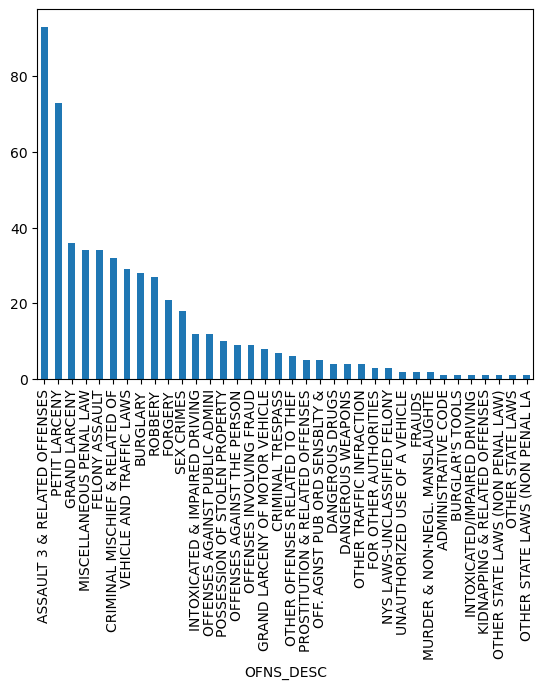

In [23]:
# quick simple plot to see that visually

df_108ArrDat.groupby('OFNS_DESC')['ARREST_KEY'].count().sort_values(ascending=False).plot(kind='bar')

In [25]:
# let's do the same for the neighbor precinct

df_104ArrDat.groupby('OFNS_DESC')['ARREST_KEY'].count().sort_values(ascending=False)

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES       122
FELONY ASSAULT                      64
PETIT LARCENY                       42
OTHER OFFENSES RELATED TO THEF      38
MISCELLANEOUS PENAL LAW             38
FORGERY                             31
CRIMINAL MISCHIEF & RELATED OF      25
ROBBERY                             25
OFFENSES AGAINST PUBLIC ADMINI      21
DANGEROUS DRUGS                     21
GRAND LARCENY                       19
SEX CRIMES                          17
VEHICLE AND TRAFFIC LAWS            16
INTOXICATED & IMPAIRED DRIVING      15
DANGEROUS WEAPONS                   12
POSSESSION OF STOLEN PROPERTY       11
OTHER STATE LAWS                     8
OTHER TRAFFIC INFRACTION             7
BURGLARY                             6
GRAND LARCENY OF MOTOR VEHICLE       5
CRIMINAL TRESPASS                    4
OFF. AGNST PUB ORD SENSBLTY &        4
OTHER STATE LAWS (NON PENAL LA       3
FRAUDS                               3
UNAUTHORIZED USE OF A VEHICLE        2
OFFENSES INVOLV

<Axes: xlabel='OFNS_DESC'>

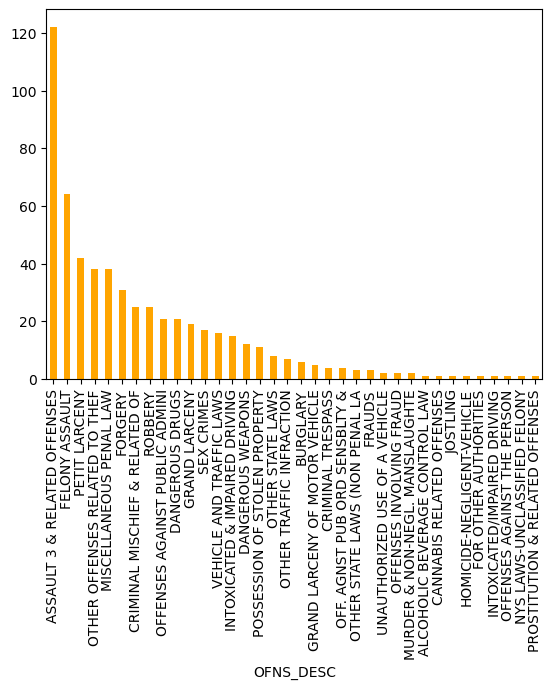

In [27]:
# quick simple plot to see that visually

df_104ArrDat.groupby('OFNS_DESC')['ARREST_KEY'].count().sort_values(ascending=False).plot(kind='bar', color='orange')

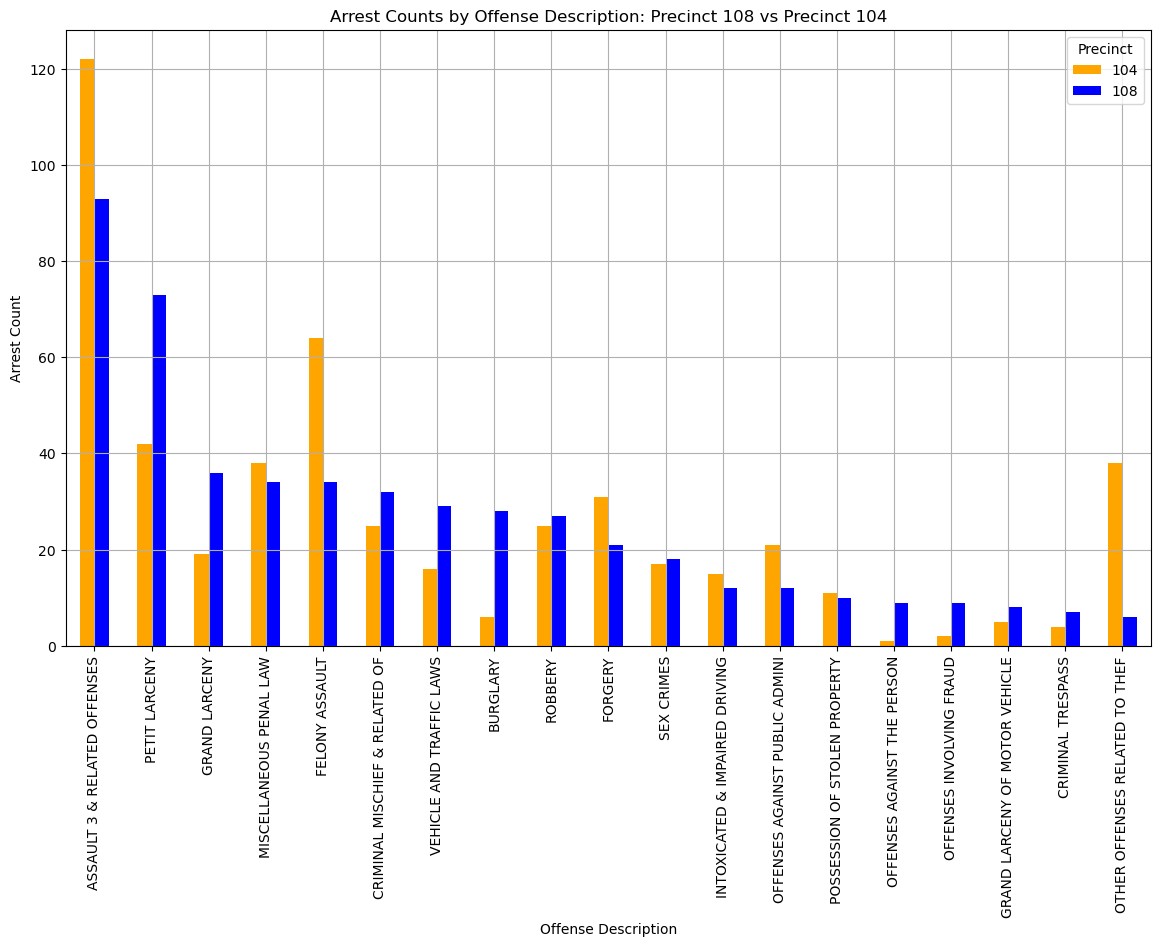

In [29]:
# let's take a look at them side by side

# create arrest_counts dataframe grouped by offense description and precinct
arrest_counts = precincts_data.groupby(['OFNS_DESC', 'ARREST_PRECINCT'])['ARREST_KEY'].count().unstack()

# since i'm caring about my precinct, i want to sort by which are the most frequent there
arrest_counts = arrest_counts.sort_values(by=108, ascending=False)

# filtering to include only OFNS_DESC with arrest count greater than 5 in Precinct 108
filtered_arrest_counts = arrest_counts[arrest_counts[108] > 5]

# keep the colors consistent to the previous viz
colors = ['blue' if column == 108 else 'orange' for column in filtered_arrest_counts.columns]

# create the plot
ax = filtered_arrest_counts.plot(kind='bar', figsize=(14, 8), color=colors)

# labels and title
plt.xlabel('Offense Description')
plt.ylabel('Arrest Count')
plt.title('Arrest Counts by Offense Description: Precinct 108 vs Precinct 104')
plt.xticks(rotation=90)
plt.legend(title='Precinct')
plt.grid(True)

plt.show()

In [31]:
# assault arrests really jump out at me as possibly looking further into. i'd like to ultimately
# see how assault arrests changed each month in each precinct, but i'll start with total arrests

# need to convert ARREST_DATE to datetime
precincts_data['ARREST_DATE'] = pd.to_datetime(precincts_data['ARREST_DATE'])
df_NYPDArrDat['ARREST_DATE'] = pd.to_datetime(df_NYPDArrDat['ARREST_DATE'])

# it will help for grouping to extract year and month from ARREST_DATE
precincts_data['YEAR'] = precincts_data['ARREST_DATE'].dt.year
precincts_data['MONTH'] = precincts_data['ARREST_DATE'].dt.month
df_NYPDArrDat['YEAR'] = df_NYPDArrDat['ARREST_DATE'].dt.year
df_NYPDArrDat['MONTH'] = df_NYPDArrDat['ARREST_DATE'].dt.month

# display the first few rows to verify changes
precincts_data.head()

/var/folders/7h/s835_rfs5hq90_9k1clks2vw0000gn/T/ipykernel_1676/1733171389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precincts_data['ARREST_DATE'] = pd.to_datetime(precincts_data['ARREST_DATE'])
/var/folders/7h/s835_rfs5hq90_9k1clks2vw0000gn/T/ipykernel_1676/1733171389.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precincts_data['YEAR'] = precincts_data['ARREST_DATE'].dt.year
/var/folders/7h/s835_rfs5hq90_9k1clks2vw0000gn/T/ipykernel_1676/1733171389.py:10: SettingWithCopyWarning: 
A value is

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,YEAR,MONTH
46,281372257,2024-01-30,268.0,CRIMINAL MIS 2 & 3,121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,F,Q,108,...,45-64,M,WHITE HISPANIC,1001596,212133,40.748916,-73.937397,POINT (-73.93739654434637 40.74891559127928),2024,1
85,280340669,2024-01-11,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,Q,104,...,25-44,M,WHITE,1023157,199211,40.713379,-73.859656,POINT (-73.85965554616779 40.71337933402749),2024,1
107,280499901,2024-01-14,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,104,...,45-64,F,WHITE,1010229,200473,40.716893,-73.906283,POINT (-73.906283 40.716893),2024,1
149,281242416,2024-01-28,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,Q,104,...,25-44,M,WHITE HISPANIC,1010039,194532,40.700586,-73.906989,POINT (-73.906989 40.700586),2024,1
166,280084385,2024-01-06,681.0,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,Q,108,...,25-44,M,WHITE HISPANIC,996424,210017,40.743125,-73.956068,POINT (-73.9560680726795 40.7431245994984),2024,1


In [33]:
# subtotals of arrests grouped by year and month of arrest date
arrests_per_month = precincts_data.groupby(['YEAR', 'MONTH']).size().reset_index(name='COMBINED_104_108_ARRESTS')

# subset out a dataframe for arrests in my precinct and neighboring precinct
arrests_per_month_precinct108 = precincts_data[precincts_data['ARREST_PRECINCT'] == 108].groupby(['YEAR', 'MONTH']).size().reset_index(name='PRECINCT108_ARRESTS')
arrests_per_month_precinct104 = precincts_data[precincts_data['ARREST_PRECINCT'] == 104].groupby(['YEAR', 'MONTH']).size().reset_index(name='PRECINCT104_ARRESTS')

# also a subset of average arrests across all precincts for overall comparison
average_arrests_per_month = df_NYPDArrDat.groupby(['YEAR', 'MONTH', 'ARREST_PRECINCT']).size().reset_index(name='ARRESTS')
average_arrests_per_month = average_arrests_per_month.groupby(['YEAR', 'MONTH'])['ARRESTS'].mean().reset_index(name='AVERAGE_ARRESTS')

# merge and display combined dataframe
merged_arrests = pd.merge(arrests_per_month, arrests_per_month_precinct108, on=['YEAR', 'MONTH'], how='left')
merged_arrests = pd.merge(merged_arrests, arrests_per_month_precinct104, on=['YEAR', 'MONTH'], how='left')
merged_arrests = pd.merge(merged_arrests, average_arrests_per_month, on=['YEAR', 'MONTH'], how='left')

merged_arrests

,YEAR,MONTH,COMBINED_104_108_ARRESTS,PRECINCT108_ARRESTS,PRECINCT104_ARRESTS,AVERAGE_ARRESTS
0,2024,1,348,169,179,278.727273
1,2024,2,393,203,190,269.077922
2,2024,3,370,167,203,278.441558


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

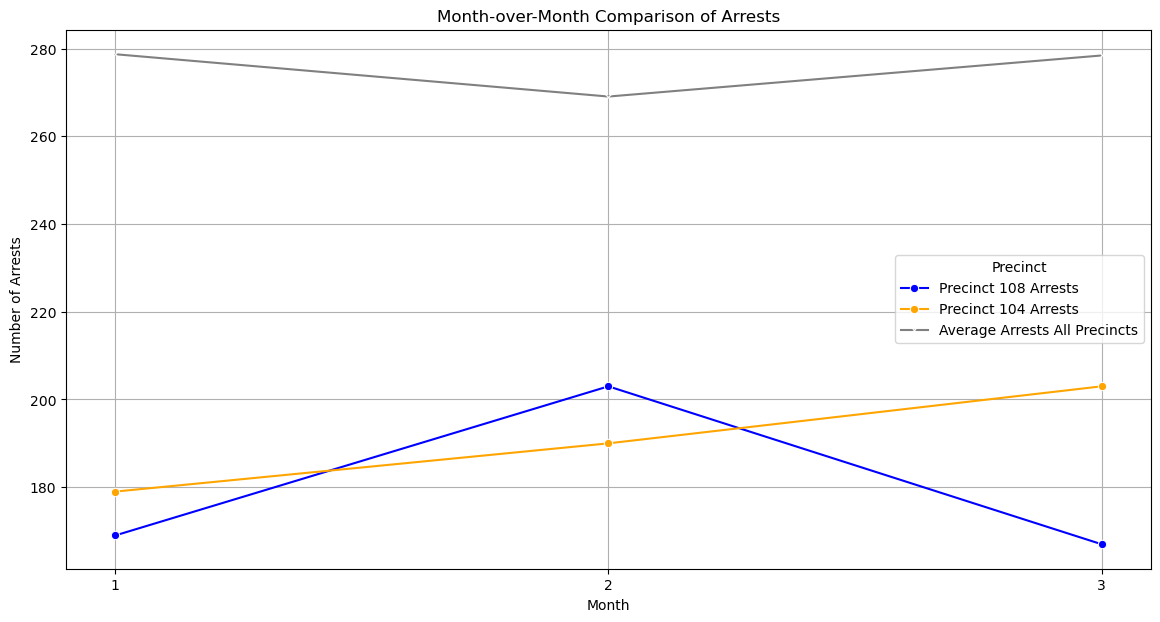

In [35]:
# set up plot to compare arrest totals between precincts
plt.figure(figsize=(14, 7))

# lineplot for pct 108 arrests
sns.lineplot(x='MONTH', y='PRECINCT108_ARRESTS', data=merged_arrests, marker='o', label=f'Precinct 108 Arrests', color='blue')

# lineplot for pct 104 arrests
sns.lineplot(x='MONTH', y='PRECINCT104_ARRESTS', data=merged_arrests, marker='o', label=f'Precinct 104 Arrests', color='orange')

# lineblot for avg pct arrests
sns.lineplot(x='MONTH', y='AVERAGE_ARRESTS', data=merged_arrests, marker='x', label=f'Average Arrests All Precincts', color='gray')

# plot finishing
plt.xlabel('Month')
plt.ylabel('Number of Arrests')
plt.title('Month-over-Month Comparison of Arrests')
plt.legend(title='Precinct')
plt.grid(True)
plt.xticks(ticks=merged_arrests['MONTH'].unique(), labels=merged_arrests['MONTH'])
plt.show()


In [45]:
# set dataframes for assaults
assaults_total = df_NYPDArrDat[df_NYPDArrDat['OFNS_DESC'].str.contains('ASSAULT')]
assaults_precincts = precincts_data[precincts_data['OFNS_DESC'].str.contains('ASSAULT')]

# aggregate assault dataframes by year and month for avg all precincts
avg_assault_arr_per_month = assaults_total.groupby(['YEAR', 'MONTH', 'ARREST_PRECINCT']).size().reset_index(name='ASSAULT ARRESTS')
avg_assault_arr_per_month = avg_assault_arr_per_month.groupby(['YEAR', 'MONTH'])['ASSAULT ARRESTS'].mean().reset_index(name='AVG_ASSAULT_ARRESTS')

# aggregate assault dataframes by year and month for 108 & 104 precincts
assault_arr_per_month_pct108 = assaults_precincts[assaults_precincts['ARREST_PRECINCT'] == 108].groupby(['YEAR', 'MONTH']).size().reset_index(name='PCT108_ASSAULT_ARRESTS')
assault_arr_per_month_pct104 = assaults_precincts[assaults_precincts['ARREST_PRECINCT'] == 104].groupby(['YEAR', 'MONTH']).size().reset_index(name='PCT104_ASSAULT_ARRESTS')

# merge and display combined dataframe
merged_assault = pd.merge(assault_arr_per_month_pct108, assault_arr_per_month_pct104, on=['YEAR', 'MONTH'], how='left')
merged_assault = pd.merge(merged_assault, avg_assault_arr_per_month, on=['YEAR', 'MONTH'], how='left')

merged_assault

,YEAR,MONTH,PCT108_ASSAULT_ARRESTS,PCT104_ASSAULT_ARRESTS,AVG_ASSAULT_ARRESTS
0,2024,1,29,51,59.766234
1,2024,2,56,74,60.363636
2,2024,3,42,61,64.909091


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

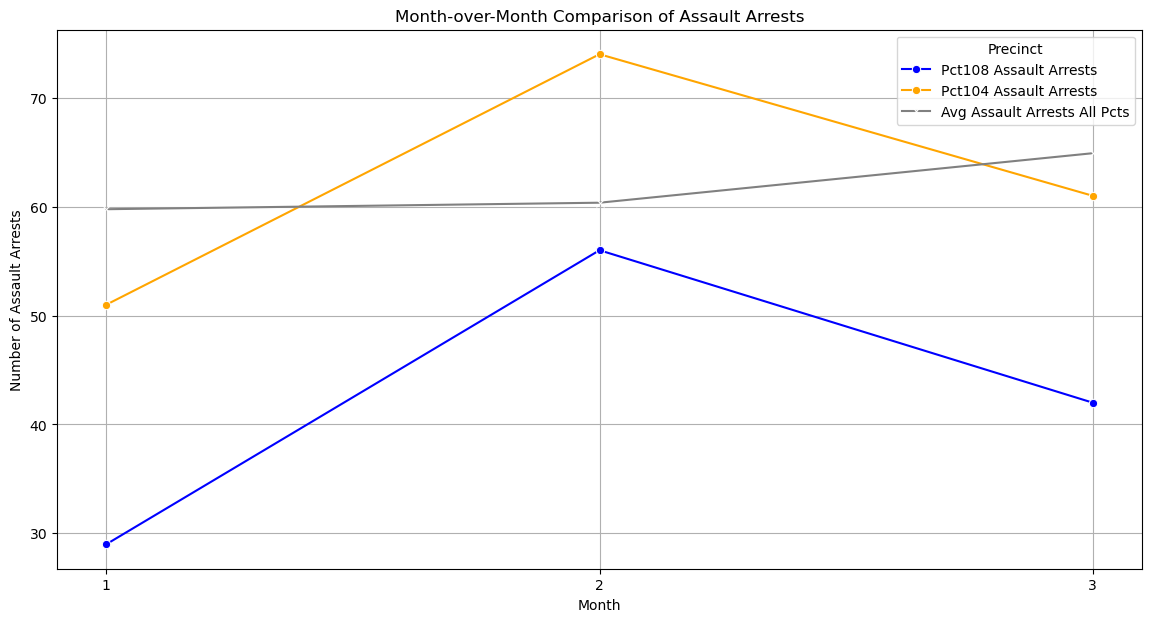

In [47]:
# set up plot to compare arrest totals between precincts
plt.figure(figsize=(14, 7))

# lineplot for pct 108 arrests
sns.lineplot(x='MONTH', y='PCT108_ASSAULT_ARRESTS', data=merged_assault, marker='o', label=f'Pct108 Assault Arrests', color='blue')

# lineplot for pct 104 arrests
sns.lineplot(x='MONTH', y='PCT104_ASSAULT_ARRESTS', data=merged_assault, marker='o', label=f'Pct104 Assault Arrests', color='orange')

# lineplot for avg pct arrests
sns.lineplot(x='MONTH', y='AVG_ASSAULT_ARRESTS', data=merged_assault, marker='x', label=f'Avg Assault Arrests All Pcts', color='gray')

# plot finishing
plt.xlabel('Month')
plt.ylabel('Number of Assault Arrests')
plt.title('Month-over-Month Comparison of Assault Arrests')
plt.legend(title='Precinct')
plt.grid(True)
plt.xticks(ticks=merged_assault['MONTH'].unique(), labels=merged_assault['MONTH'])
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

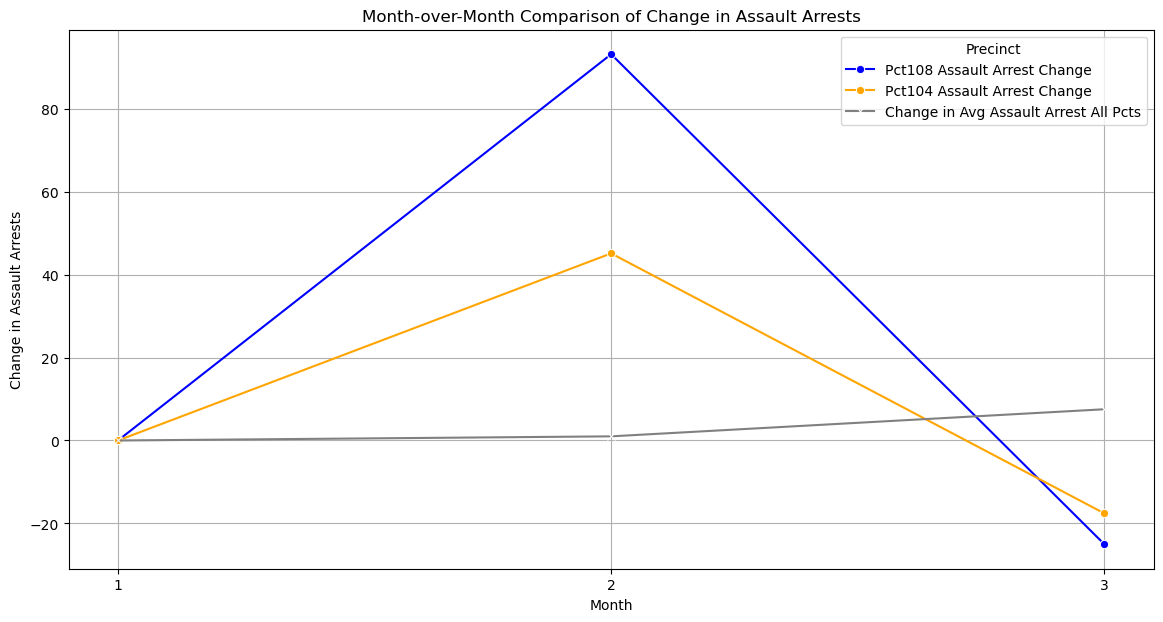

In [49]:
# set a column for percent change month to month & set first month to 0
merged_assault['PERCENT_CHG_AVG'] = merged_assault['AVG_ASSAULT_ARRESTS'].pct_change().fillna(0) * 100
merged_assault['PERCENT_CHG_P108'] = merged_assault['PCT108_ASSAULT_ARRESTS'].pct_change().fillna(0) * 100
merged_assault['PERCENT_CHG_P104'] = merged_assault['PCT104_ASSAULT_ARRESTS'].pct_change().fillna(0) * 100

merged_assault.loc[0, 'PERCENT_CHG_AVG'] = 0
merged_assault.loc[0, 'PERCENT_CHG_P108'] = 0
merged_assault.loc[0, 'PERCENT_CHG_P104'] = 0

# set up plot to compare arrest totals between precincts
plt.figure(figsize=(14, 7))

# lineplot for percent change in assaults
sns.lineplot(x='MONTH', y='PERCENT_CHG_P108', data=merged_assault, marker='o', label=f'Pct108 Assault Arrest Change', color='blue')

# lineplot for pct 104 arrests
sns.lineplot(x='MONTH', y='PERCENT_CHG_P104', data=merged_assault, marker='o', label=f'Pct104 Assault Arrest Change', color='orange')

# lineplot for avg pct arrests
sns.lineplot(x='MONTH', y='PERCENT_CHG_AVG', data=merged_assault, marker='x', label=f'Change in Avg Assault Arrest All Pcts', color='gray')

# plot finishing
plt.xlabel('Month')
plt.ylabel('Change in Assault Arrests')
plt.title('Month-over-Month Comparison of Change in Assault Arrests')
plt.legend(title='Precinct')
plt.grid(True)
plt.xticks(ticks=merged_assault['MONTH'].unique(), labels=merged_assault['MONTH'])
plt.show()

In [51]:
# my question was how assault arrests changed from month to month in my own precinct
# and a neighboring precinct as compared to the average change in assault arrests.
# my conclusion is that assault arrests increased sharply in my own precinct compared to 
# the neighbor precinct and the average from the first to the second month, but that assault arrests 
# decreased the sharpest from month 2 to 3 in my precinct, less sharply in the neighbor precinct
# and increased slightly on average